In [27]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/hospital_readmissions_30k.csv')
df

,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,29,Male,112/80,157,31.4,No,No,4,10,Home,Yes
29996,29997,20,Other,146/83,198,30.2,No,Yes,4,1,Home,Yes
29997,29998,40,Other,131/96,275,23.3,Yes,Yes,7,2,Home,No
29998,29999,61,Other,124/75,232,34.3,No,No,5,3,Home,No


In [29]:
df.isnull().sum()

,0
patient_id,0
age,0
gender,0
blood_pressure,0
cholesterol,0
bmi,0
diabetes,0
hypertension,0
medication_count,0
length_of_stay,0


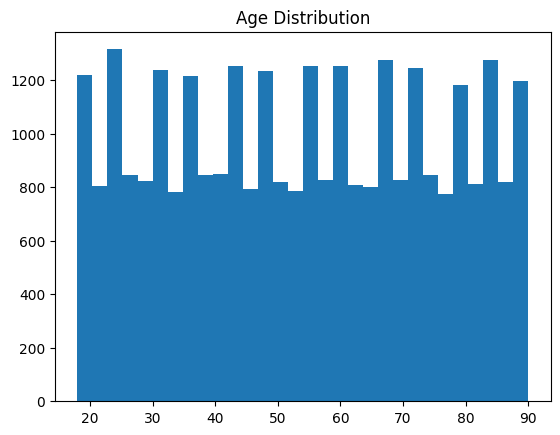

In [30]:
plt.hist(df['age'], bins=30)
plt.title("Age Distribution")
plt.show()

In [31]:
# Convert target to 0/1 on the FULL dataset
df['readmitted_30_days'] = df['readmitted_30_days'].map({'No': 0, 'Yes': 1})

# Double-check
print(df['readmitted_30_days'].unique())


[1 0]


Define Features & Target

In [38]:
X = pd.get_dummies(X, drop_first=True)
X = df.drop(columns=['patient_id', 'readmitted_30_days'])
y = df['readmitted_30_days']

X.shape, y.shape


((30000, 10), (30000,))

This separates:

Predictors (X) = all clinical variables

Target (y) = 30-day readmission

#Encode Categorical Variables

In [39]:
X = pd.get_dummies(X, drop_first=True)
X.head()


,age,cholesterol,bmi,medication_count,length_of_stay,gender_Male,gender_Other,blood_pressure_110/70,blood_pressure_110/71,blood_pressure_110/72,...,blood_pressure_160/94,blood_pressure_160/95,blood_pressure_160/96,blood_pressure_160/97,blood_pressure_160/98,blood_pressure_160/99,diabetes_Yes,hypertension_Yes,discharge_destination_Nursing_Facility,discharge_destination_Rehab
0,74,240,31.5,5,1,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,46,292,36.3,4,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,89,153,30.3,1,1,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,84,153,31.5,3,10,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,32,205,18.4,6,4,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False


#Train–Test Split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((22500, 1591), (7500, 1591))

##Training the First Real Clinical ML Model

In [41]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

#Evaluate Model Performance

In [42]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93      6582
           1       0.08      0.00      0.00       918

    accuracy                           0.88      7500
   macro avg       0.48      0.50      0.47      7500
weighted avg       0.78      0.88      0.82      7500

ROC-AUC: 0.5414527572060595


#Plot ROC Curve

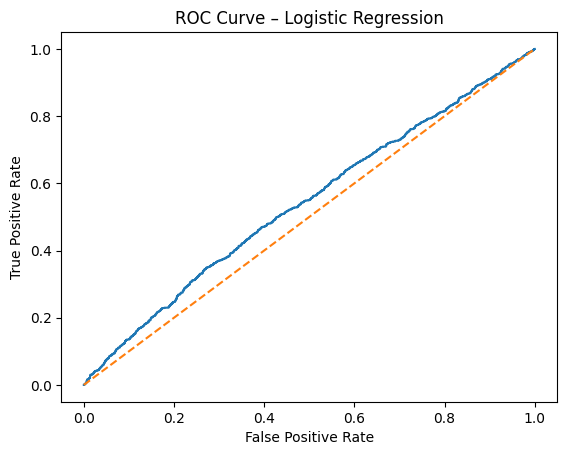

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.show()


#Train a Stronger Nonlinear Model (Random Forest)

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

rf.fit(X_train, y_train)

y_rf_prob = rf.predict_proba(X_test)[:,1]
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_rf_prob))


Random Forest ROC-AUC: 0.5491050061268303


#Feature Importance (Clinical Interpretation)

In [45]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


,0
discharge_destination_Rehab,0.086593
cholesterol,0.068971
bmi,0.067094
age,0.066598
medication_count,0.063458
length_of_stay,0.058540
discharge_destination_Nursing_Facility,0.037639
diabetes_Yes,0.036922
hypertension_Yes,0.030866
gender_Other,0.024324
